In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
%matplotlib inline


In [2]:
# make qutip available in the rest of the notebook
from qutip import *

In [3]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength

N = 15              # number of cavity fock states (Numeric Precission)
use_rwa = True      # Use RWA
print('wa+wc=',wa+wc)
print('wa-wc=',wa-wc)
print('g=',g)

tlist = np.arange(0,10,0.01)

wa+wc= 12.566370614359172
wa-wc= 0.0
g= 0.3141592653589793


In [4]:
# intial state
psia= basis(2,1) #Atom excited state
psic= basis(N,0) #Cavity vacuum

psi0 = tensor(psic,psia)    # Full Inicial state

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

Text(0.5, 1.0, 'Vacuum Rabi oscillations RWA')

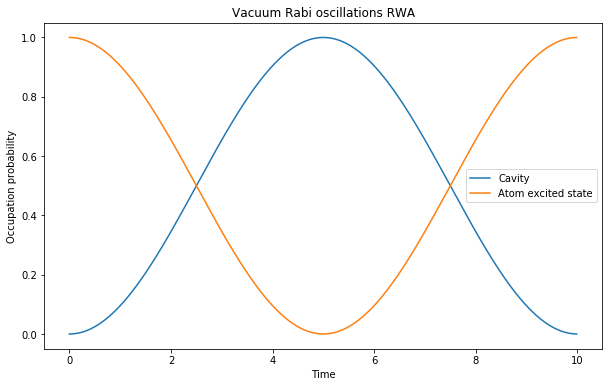

In [5]:
output = mesolve(H, psi0, tlist, [], [a.dag() * a, sm.dag() * sm])

n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations RWA')

In [6]:
use_rwa = False #NO RWA

In [7]:
# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

Text(0.5, 1.0, 'Vacuum Rabi oscillations NO RWA')

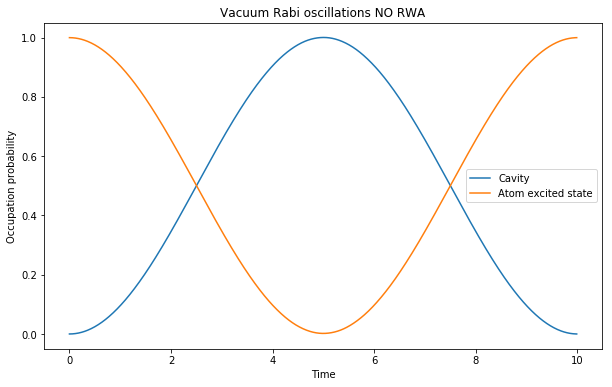

In [8]:
output = mesolve(H, psi0, tlist, [], [a.dag() * a, sm.dag() * sm])

n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations NO RWA')